## Load packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

## Define functions

### Sigmoid

In [2]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    s = 1 / (1 + np.exp(-z))

    return s

# Test the sigmoid function
print("Testing sigmoid function:")
print(f"sigmoid(0) = {sigmoid(0)}")  # Should be 0.5
print(f"sigmoid(2) = {sigmoid(2)}")  # Should be ~0.88
print(f"sigmoid(-2) = {sigmoid(-2)}")  # Should be ~0.12
print(f"sigmoid(array) = {sigmoid(np.array([1, 2, 3]))}")  # Should work with arrays
print()

Testing sigmoid function:
sigmoid(0) = 0.5
sigmoid(2) = 0.8807970779778823
sigmoid(-2) = 0.11920292202211755
sigmoid(array) = [0.73105858 0.88079708 0.95257413]



### Initialize weights

In [3]:
def initialize_weights(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.

    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)

    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """

    w = np.zeros((dim, 1))
    b = 0.0

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))

    return w, b

# Test the initialize_weights function
print("Testing initialize_weights function:")
w, b = initialize_weights(784)
print(f"w shape: {w.shape}")  # Should be (784, 1)
print(f"b value: {b}")  # Should be 0 or 0.0
print(f"First 5 weights: {w[:5].flatten()}")  # Should be all zeros
print()

Testing initialize_weights function:
w shape: (784, 1)
b value: 0.0
First 5 weights: [0. 0. 0. 0. 0.]



### Forward and backward propagation

In [4]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained in the assignment

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px, 1)
    b -- bias, a scalar
    X -- data of size (number of examples, num_px * num_px)
    Y -- true "label" vector of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b

    """

    m = X.shape[0]

    # FORWARD PROPAGATION (FROM X TO COST)---------------------------------

    # Compute activation: sigmoid(w^T * X + b)
    Z = X @ w + b  #Note: X is (m, 784), w is (784, 1), so we compute X @ w which gives (m, 1)
    Yhat = sigmoid(Z)  # (m, 1) - predictions

    # Compute cost
    # J = 1/m * sum(-Y * log(Yhat) - (1-Y) * log(1-Yhat))
    cost = 1/m * np.sum(-Y * np.log(Yhat) - (1 - Y) * np.log(1 - Yhat))

    # BACKWARD PROPAGATION (TO FIND GRAD)---------------------------------

    # dw = 1/m * X^T * (A - Y)
    # db = 1/m * sum(A - Y)
    dw = 1/m * (X.T @ (Yhat - Y))  # (784, 1)
    db = 1/m * np.sum(Yhat - Y)  # scalar

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())

    grads = {"dw": dw,
             "db": db}

    return grads, cost

# Test the propagate function
print("Testing propagate function:")
# Create small test data
X_test = np.random.randn(5, 784)  # 5 examples, 784 features
Y_test = np.array([[0, 1, 0, 1, 1]]).T  # 5 labels as column vector
w_test, b_test = initialize_weights(784)

grads, cost = propagate(w_test, b_test, X_test, Y_test)
print(f"Cost: {cost}")
print(f"dw shape: {grads['dw'].shape}")
print(f"db value: {grads['db']}")
print()

Testing propagate function:
Cost: 0.6931471805599454
dw shape: (784, 1)
db value: -0.1



### Gradient descent

In [5]:
def gradient_descent(w, b, X, Y, num_iterations, learning_rate):
    """
    This function optimizes w and b by running a gradient descent algorithm

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px, number of examples)
    Y -- true "label" vector of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule

    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.

    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """

    costs = []

    for i in range(num_iterations):


        # Cost and gradient calculation

        grads, cost = propagate(w, b, X, Y)

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        # update rule
        # w := w - learning_rate * dw
        # b := b - learning_rate * db
        w = w - learning_rate * dw
        b = b - learning_rate * db

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
            # Print the cost every 100 training examples
            print ("Cost after iteration %i: %f" % (i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs




# Test the gradient_descent function
print("Testing gradient_descent function:")
X_test = np.random.randn(10, 784)  # 10 examples
Y_test = np.random.randint(0, 2, (10, 1))  # Random labels
w_test, b_test = initialize_weights(784)

params, grads, costs = gradient_descent(w_test, b_test, X_test, Y_test, num_iterations=500, learning_rate=0.01)
print(f"Final cost: {costs[-1]}")
print(f"Number of costs recorded: {len(costs)}")
print()


Testing gradient_descent function:
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.014095
Cost after iteration 200: 0.006999
Cost after iteration 300: 0.004651
Cost after iteration 400: 0.003482
Final cost: 0.0034815689445695758
Number of costs recorded: 5



### Make predictions

In [6]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px, number of examples)

    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''

    m = X.shape[0]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[1], 1)

    # Compute vector "A" predicting the probabilities of the picture containing a 1

    A = sigmoid(np.dot(w.T, X.T) + b)


    Y_prediction = (A > 0.5).astype(int)


    assert(Y_prediction.shape == (1, m))

    return Y_prediction

# Test the predict function
print("Testing predict function:")
X_test = np.random.randn(5, 784)
w_test = np.random.randn(784, 1) * 0.01
b_test = 0.0

predictions = predict(w_test, b_test, X_test)
print(f"Predictions shape: {predictions.shape}")
print(f"Predictions: {predictions.flatten()}")
print(f"All predictions are 0 or 1: {np.all((predictions == 0) | (predictions == 1))}")
print()
print("="*70)
print("All helper functions tested successfully!")
print("="*70)
print()

Testing predict function:
Predictions shape: (1, 5)
Predictions: [1 0 1 0 1]
All predictions are 0 or 1: True

All helper functions tested successfully!



## Merge functions and run your model

In [16]:
# LOAD DATA
class0 = 0
class1 = 1

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train[np.isin(y_train,[class0,class1]),:,:]
y_train = 1*(y_train[np.isin(y_train,[class0,class1])]>class0)
y_train = y_train.reshape(-1, 1)  # Make it (n, 1) instead of (n,)
x_test = x_test[np.isin(y_test,[class0,class1]),:,:]
y_test = 1*(y_test[np.isin(y_test,[class0,class1])]>class0)
y_test = y_test.reshape(-1, 1) # Make it (n, 1) instead of (n,)

In [17]:
# RESHAPE

x_train_flat = x_train.reshape(x_train.shape[0],-1)
print(x_train_flat.shape)
print('Train: '+str(x_train_flat.shape[0])+' images and '+str(x_train_flat.shape[1])+' neurons \n')

x_test_flat = x_test.reshape(x_test.shape[0],-1)
print(x_test_flat.shape)
print('Test: '+str(x_test_flat.shape[0])+' images and '+str(x_test_flat.shape[1])+' neurons \n')

# STRANDARIZE
x_train_flat = x_train_flat / 255
x_test_flat = x_test_flat / 255

(12665, 784)
Train: 12665 images and 784 neurons 

(2115, 784)
Test: 2115 images and 784 neurons 



### Train the model (in training set)

In [18]:
# Initialize parameters with zeros (≈ 1 line of code)
w, b = initialize_weights(x_train_flat.shape[1])

# Gradient descent (≈ 1 line of code)
learning_rate = 0.005
num_iterations = 2000
parameters, grads, costs = gradient_descent(w, b, x_train_flat, y_train, num_iterations, learning_rate)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.201280
Cost after iteration 200: 0.120349
Cost after iteration 300: 0.088112
Cost after iteration 400: 0.070691
Cost after iteration 500: 0.059708
Cost after iteration 600: 0.052112
Cost after iteration 700: 0.046521
Cost after iteration 800: 0.042221
Cost after iteration 900: 0.038801
Cost after iteration 1000: 0.036010
Cost after iteration 1100: 0.033685
Cost after iteration 1200: 0.031714
Cost after iteration 1300: 0.030021
Cost after iteration 1400: 0.028548
Cost after iteration 1500: 0.027255
Cost after iteration 1600: 0.026108
Cost after iteration 1700: 0.025083
Cost after iteration 1800: 0.024162
Cost after iteration 1900: 0.023329


### Test the model (in testing set)


train accuracy: 50.21368250970334 %
test accuracy: 50.27547239407809 %



Text(0.5, 1.0, 'Template')

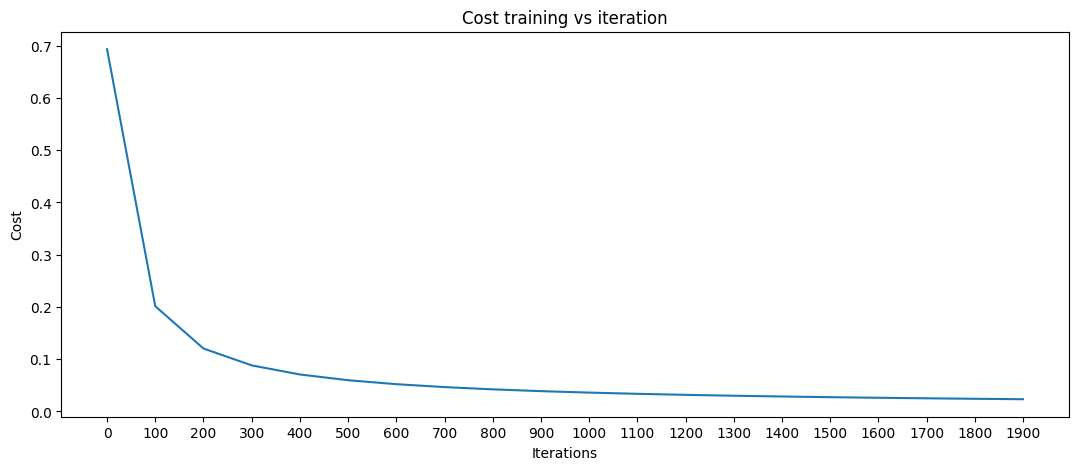

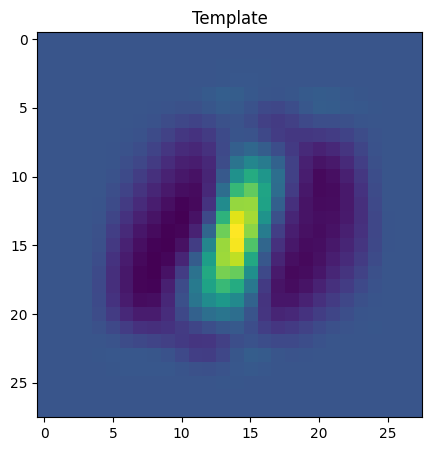

In [19]:
# Retrieve parameters w and b from dictionary "parameters"
w = parameters["w"]
b = parameters["b"]

# Predict test/train set examples (≈ 2 lines of code)
y_prediction_test = predict(w, b, x_test_flat)
y_prediction_train = predict(w, b, x_train_flat)

# Print train/test Errors
print('')
print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
print('')

plt.figure(figsize=(13,5))
plt.plot(range(0,2000,100),costs)
plt.title('Cost training vs iteration')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.xticks(range(0,2000,100))


plt.figure(figsize=(13,5))
plt.imshow(w.reshape(28,28))
plt.title('Template')
